In [2]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# Load dataset
df = pd.read_csv("/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv") 

# Keep only numerical features relevant to clustering
df_cluster = df[['CocoaPercent', 'Rating']].dropna()
df_cluster['CocoaPercent'] = df_cluster['CocoaPercent'] * 100  # convert to %

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Optional: turn into DataFrame for better visuals
scaled_df = pd.DataFrame(scaled_data, columns=df_cluster.columns)

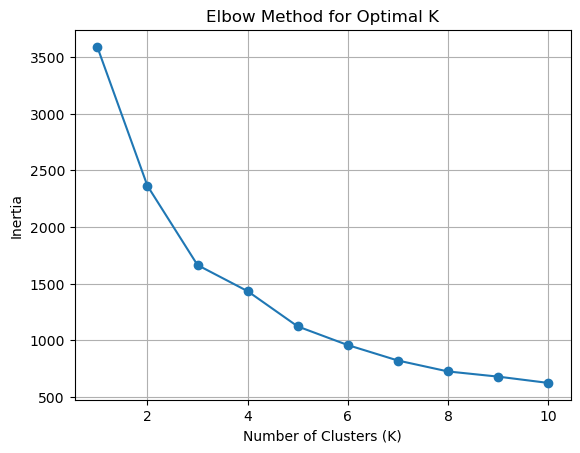

In [10]:
inertia = []

# Try K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### Chosen K

Based on the elbow plot, we chose **K = 3** because the rate of decrease in inertia slows after that point, indicating diminishing returns beyond 3 clusters.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

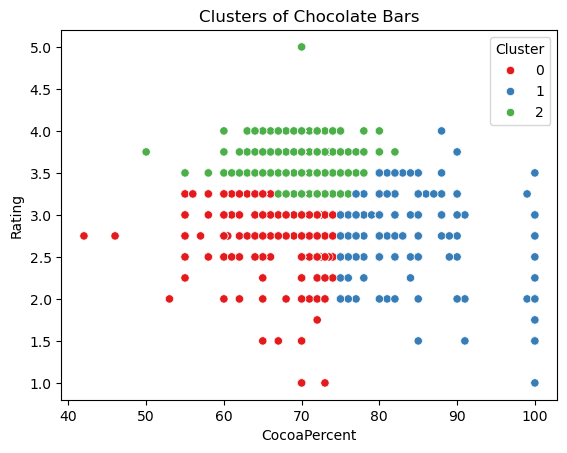

In [19]:
sns.scatterplot(data=df_cluster, x='CocoaPercent', y='Rating', hue='Cluster', palette='Set1')
plt.title('Clusters of Chocolate Bars')
plt.show()

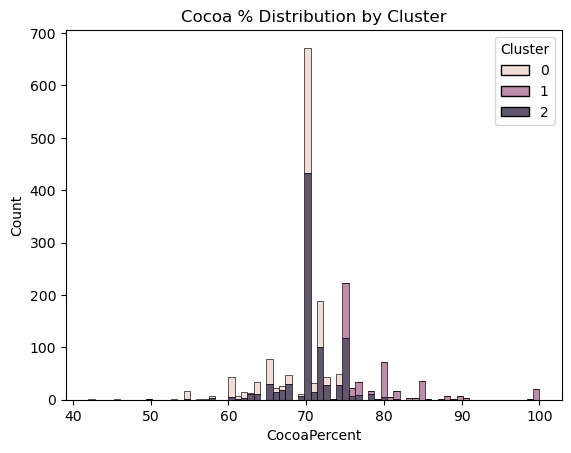

In [21]:
sns.histplot(data=df_cluster, x='CocoaPercent', hue='Cluster', multiple='stack')
plt.title('Cocoa % Distribution by Cluster')
plt.show()

### Cluster Interpretation

The clusters show meaningful groupings based on cocoa content and rating:
- One cluster contains high cocoa %, possibly darker chocolates.
- Another might reflect average-rated chocolates.
- The third may group lower-rated, low-cocoa products.

This separation could be linked to different chocolate types or production quality.

If the clusters are overlapping or unclear, this could suggest other variables (e.g., origin, bean type) are more important to include or analyze further.

In [24]:
group_stats = df_cluster.groupby('Cluster').agg({
    'CocoaPercent': ['mean', 'min', 'max'],
    'Rating': ['mean', 'min', 'max']
})
print(group_stats)

        CocoaPercent                 Rating            
                mean   min    max      mean   min   max
Cluster                                                
0          68.125436  42.0   74.0  2.812282  1.00  3.25
1          80.659574  75.0  100.0  2.837386  1.00  4.00
2          70.692265  50.0   82.0  3.554933  3.25  5.00


### Reflections and Future Use

Clustering can help identify chocolate profiles:
- **High-quality dark bars**
- **Mid-range average bars**
- **Low-rated low-cocoa bars**

In future steps, these clusters could:
- Support targeted marketing (e.g., promoting premium bars)
- Guide further segmentation (e.g., by bean type or country)
- Be used as features in a predictive model (e.g., predicting sales or success)

Clustering reveals hidden structure and helps us explore the data beyond traditional variables.